# Credit Card Default

We are going to use classification method to classify two two-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following you will need to solve a Bank Fraud Detection Case where you will classify two multiple-feature groups.

**Data Description:**


**id**: A unique Id field which represents a customer

**X1**: Credit line

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. X6 = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.X12- X17: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; X19 = amount paid in August, 2015; X23 = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the customer is default (1) or not (0).

This is a real problem to classify multi-feature data into two groups.



**1. Load the data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load csv files and check shape
train_data = pd.read_csv('credit_train.csv')
test_data = pd.read_csv('credit_test.csv')
print(train_data.shape)
print(test_data.shape)
# Training data has 1 more column than Test bc it includes target variable

(25000, 25)
(5000, 24)


In [3]:
# Check columns
train_data.columns

Index(['id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [4]:
# Check data types
train_data.dtypes

id     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [5]:
# check for nulls
train_data.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [6]:
# View snapshop of data using integer locator
train_data.iloc[0:10,6:12]

,X6,X7,X8,X9,X10,X11
0,0,0,0,0,0,0
1,0,0,0,2,0,0
2,0,0,0,0,0,0
3,1,-2,-2,-1,0,0
4,-1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,2
6,0,-1,-1,-1,0,-1
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,-2,-2,-2,-2,-2,-2


**2. Distinguish categorical and continuous variables**

In [16]:
categorical_v =  []
continous_v = []
cat_threshold = 15

# Loop through columns and categorize into variable type
for column in train_data.columns:
    if len(train_data[column].value_counts().index)<=cat_threshold:
        categorical_v.append(column)
    else:
        continous_v.append(column)
categorical_v.remove('Y')
target = ['Y']

In [17]:
print(f'The continous variables:{continous_v}')
print(f'The categorical variables:{categorical_v}')

The continous variables:['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
The categorical variables:['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


**3. Basic feature analysis**

i. Check the pattern differences between the training data and testing data

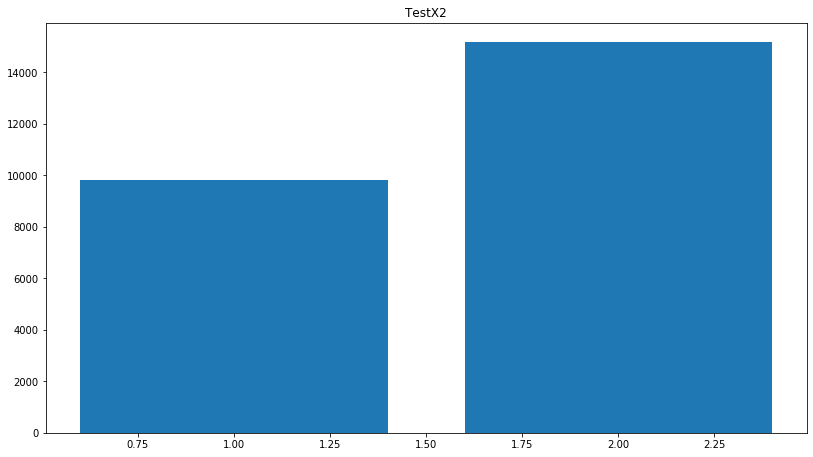

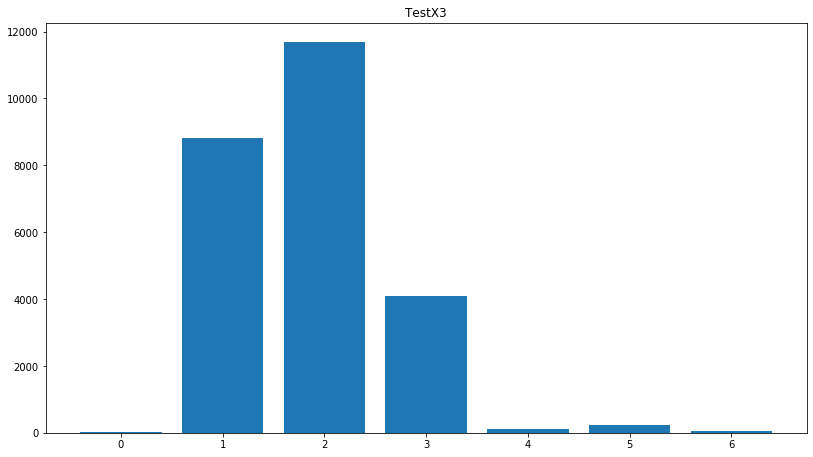

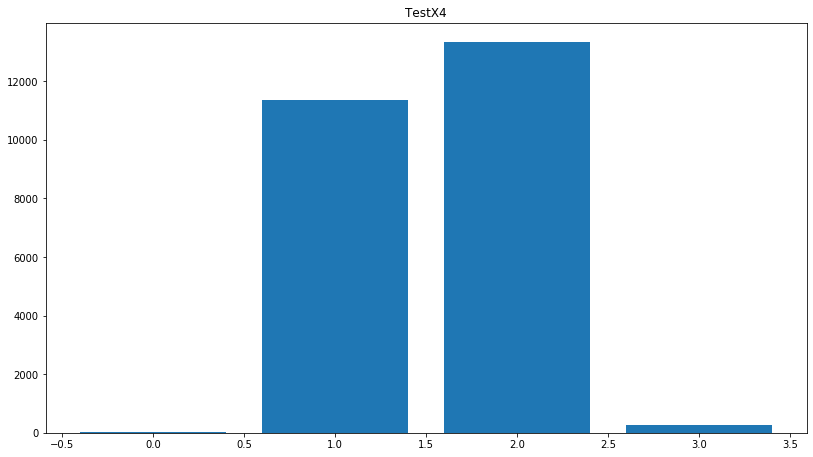

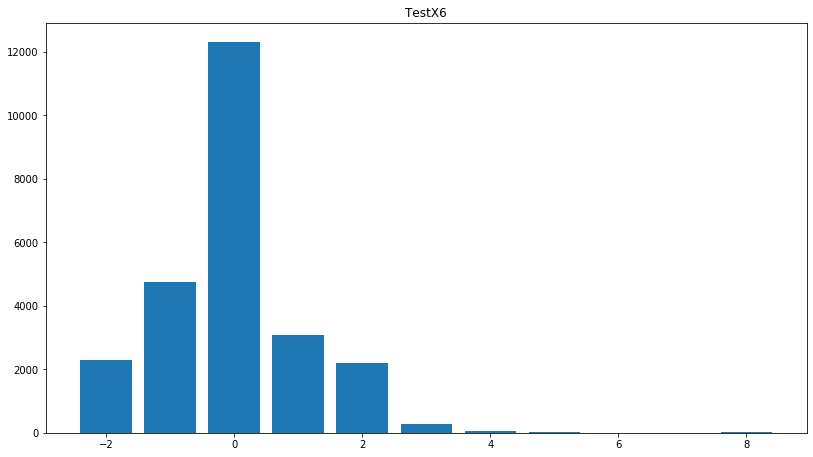

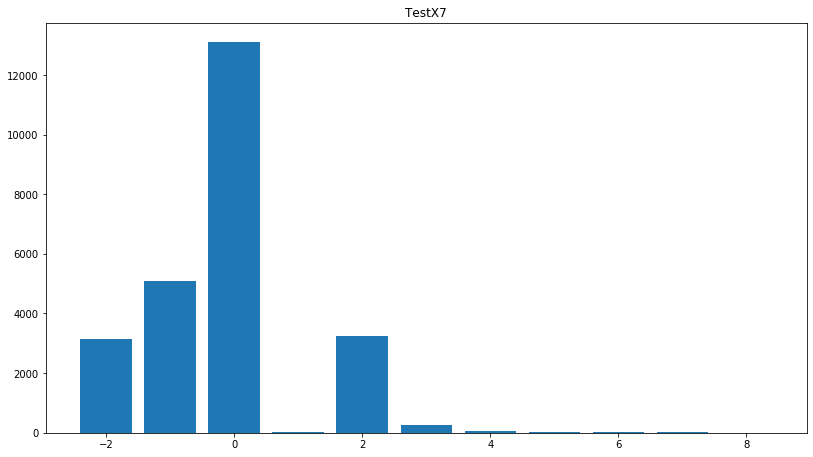

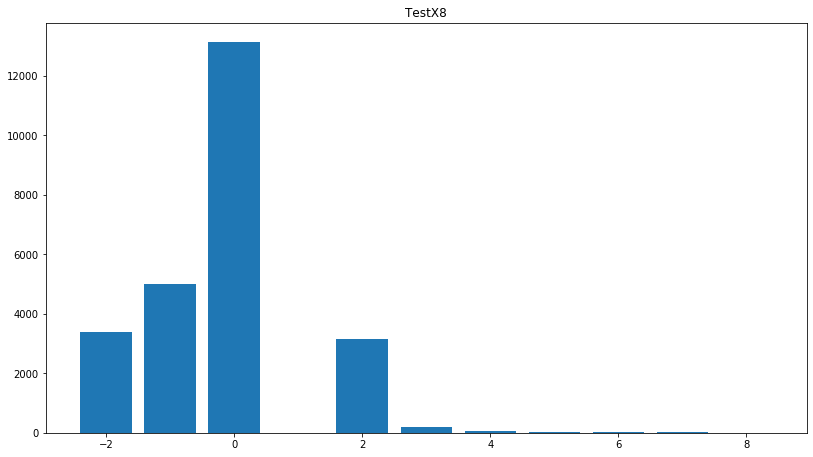

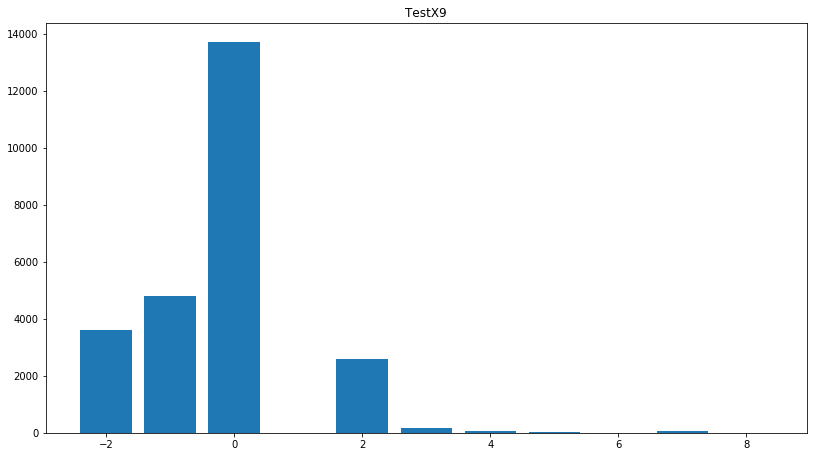

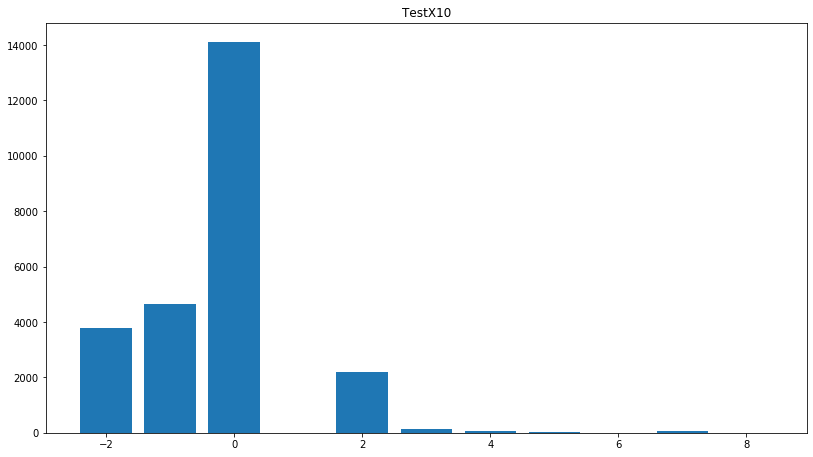

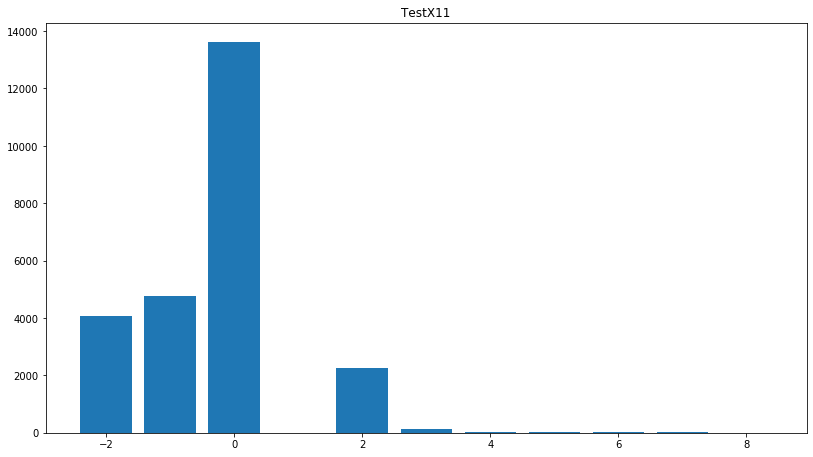

In [20]:
count = 1
for i in range(len(categorical_v)):
    fig = plt.figure(figsize=(30,80))
    plt.subplot(len(categorical_v), 2, count)
    plt.bar(train_data[categorical_v[i]].value_counts().index, train_data[categorical_v[i]].value_counts().values)
    plt.title('Test'+categorical_v[i])
    count+=2

/Users/juanvasquez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


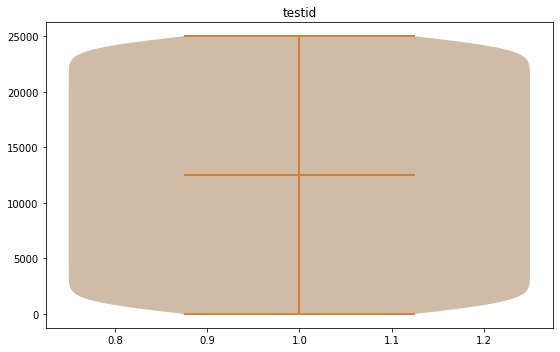

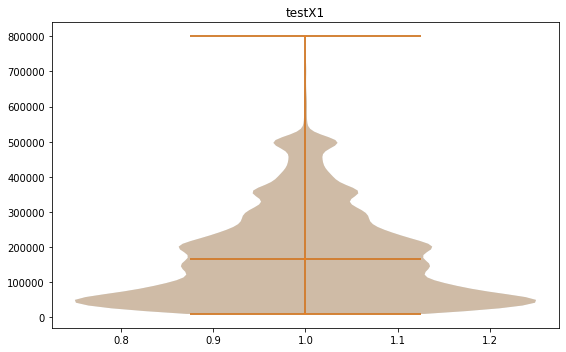

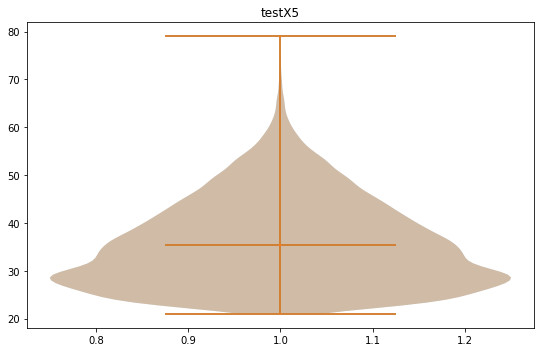

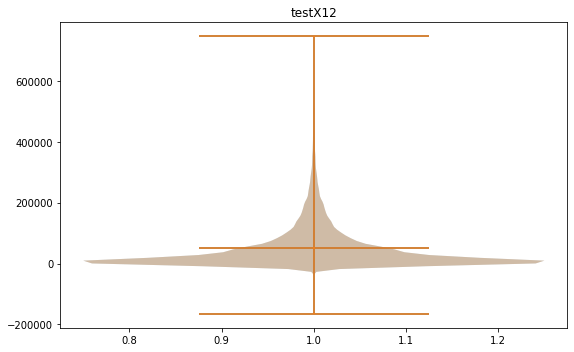

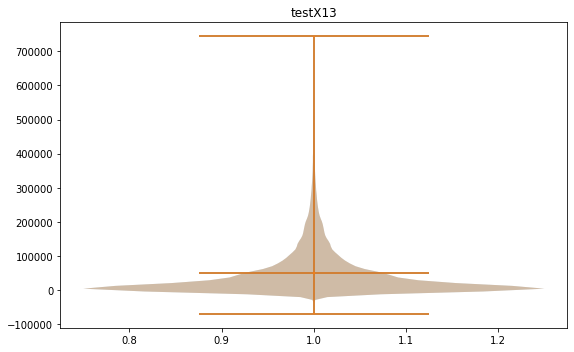

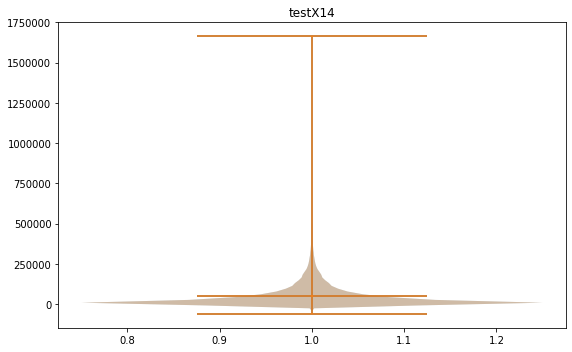

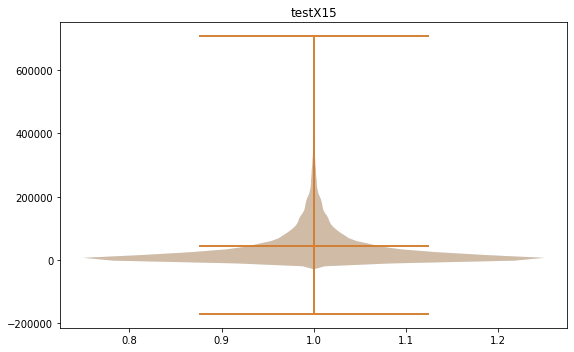

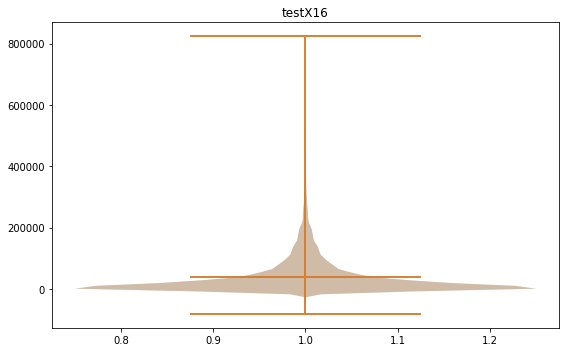

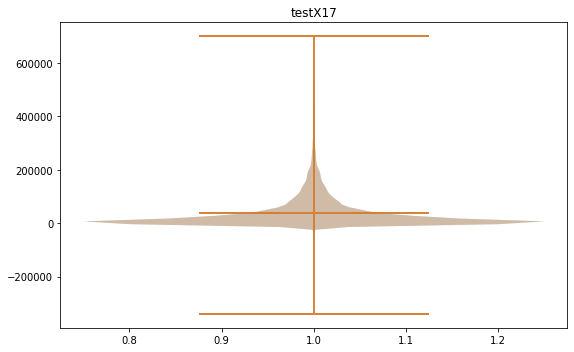

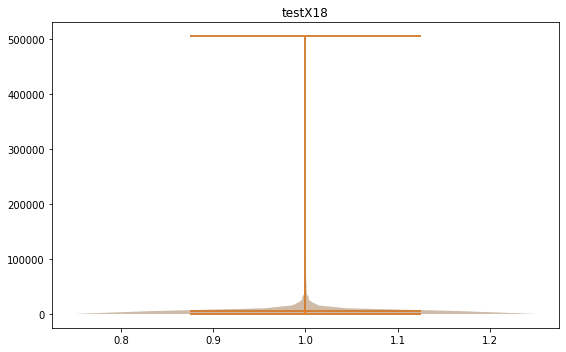

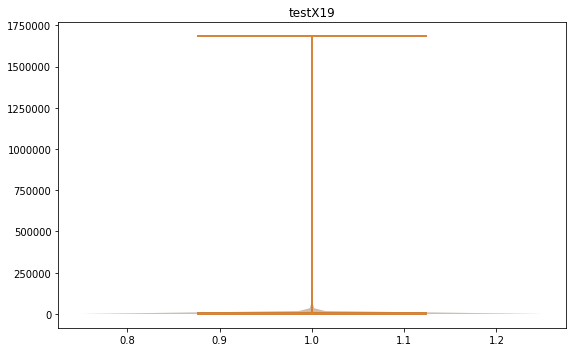

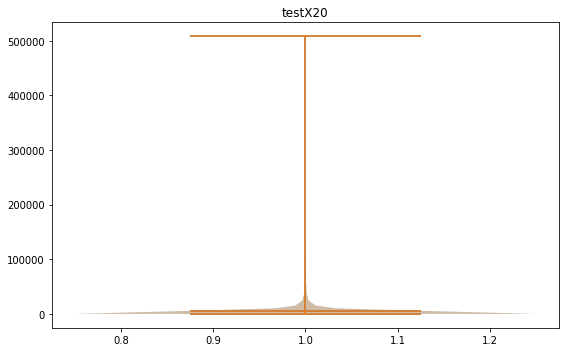

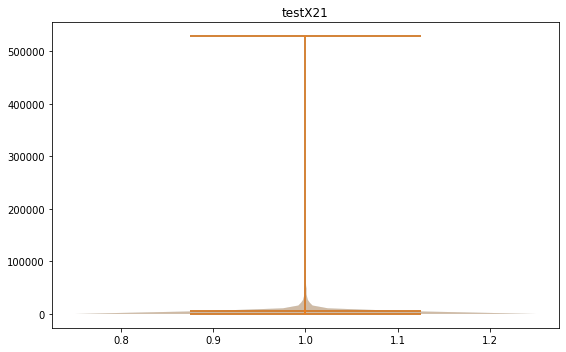

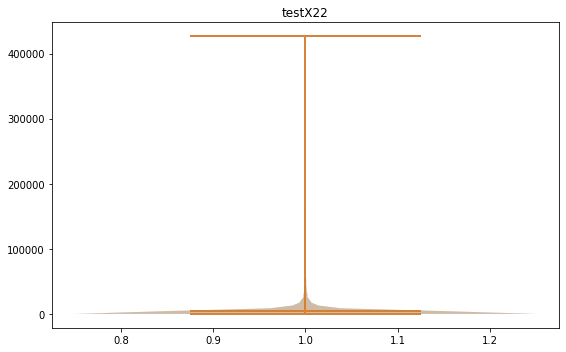

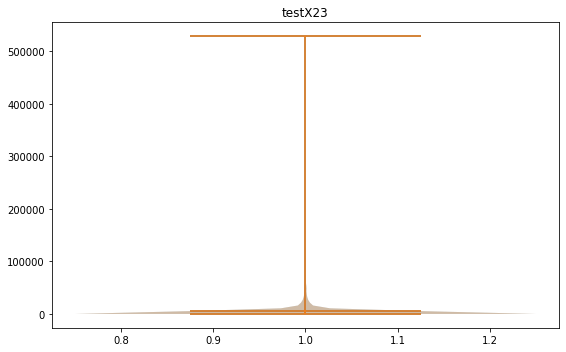

In [22]:
count = 1
for i in range(len(continous_v)):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(continous_v), 2, count)
    plt.violinplot(train_data[continous_v[i]], showmeans=True)
    plt.title('Train'+continous_v[i])
    
    plt.subplot(len(continous_v), 2, count)
    plt.violinplot(train_data[continous_v[i]], showmeans=True)
    plt.title('test'+continous_v[i])
    count+=2

ii. Check the if there are linear relationships between features

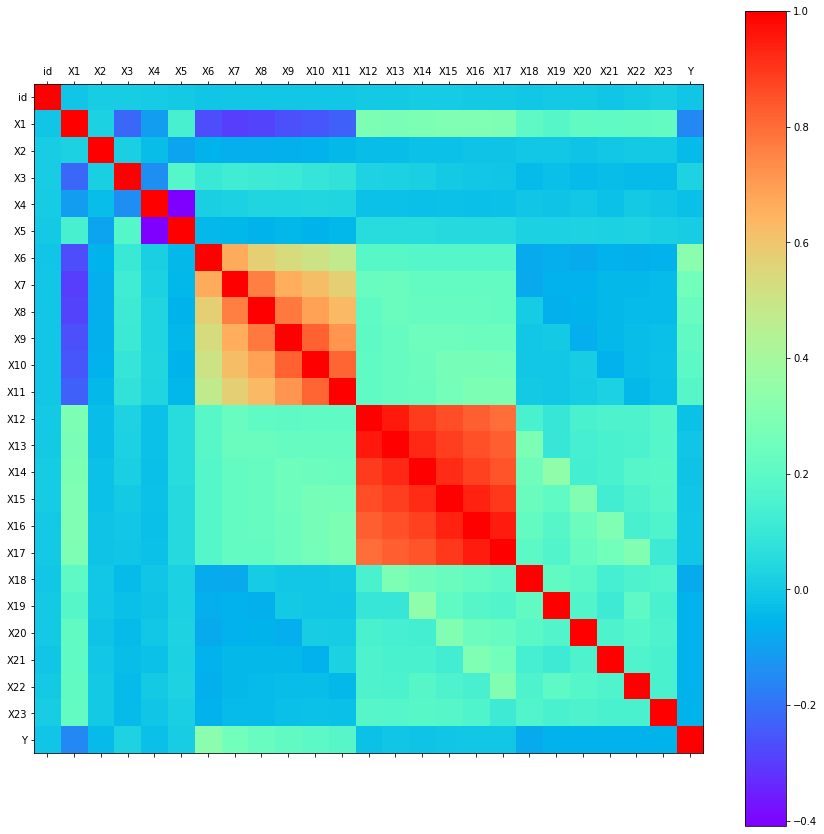

In [23]:
# Check correlation
def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
plot_corr(train_data)

iii. Check the pattern of the label

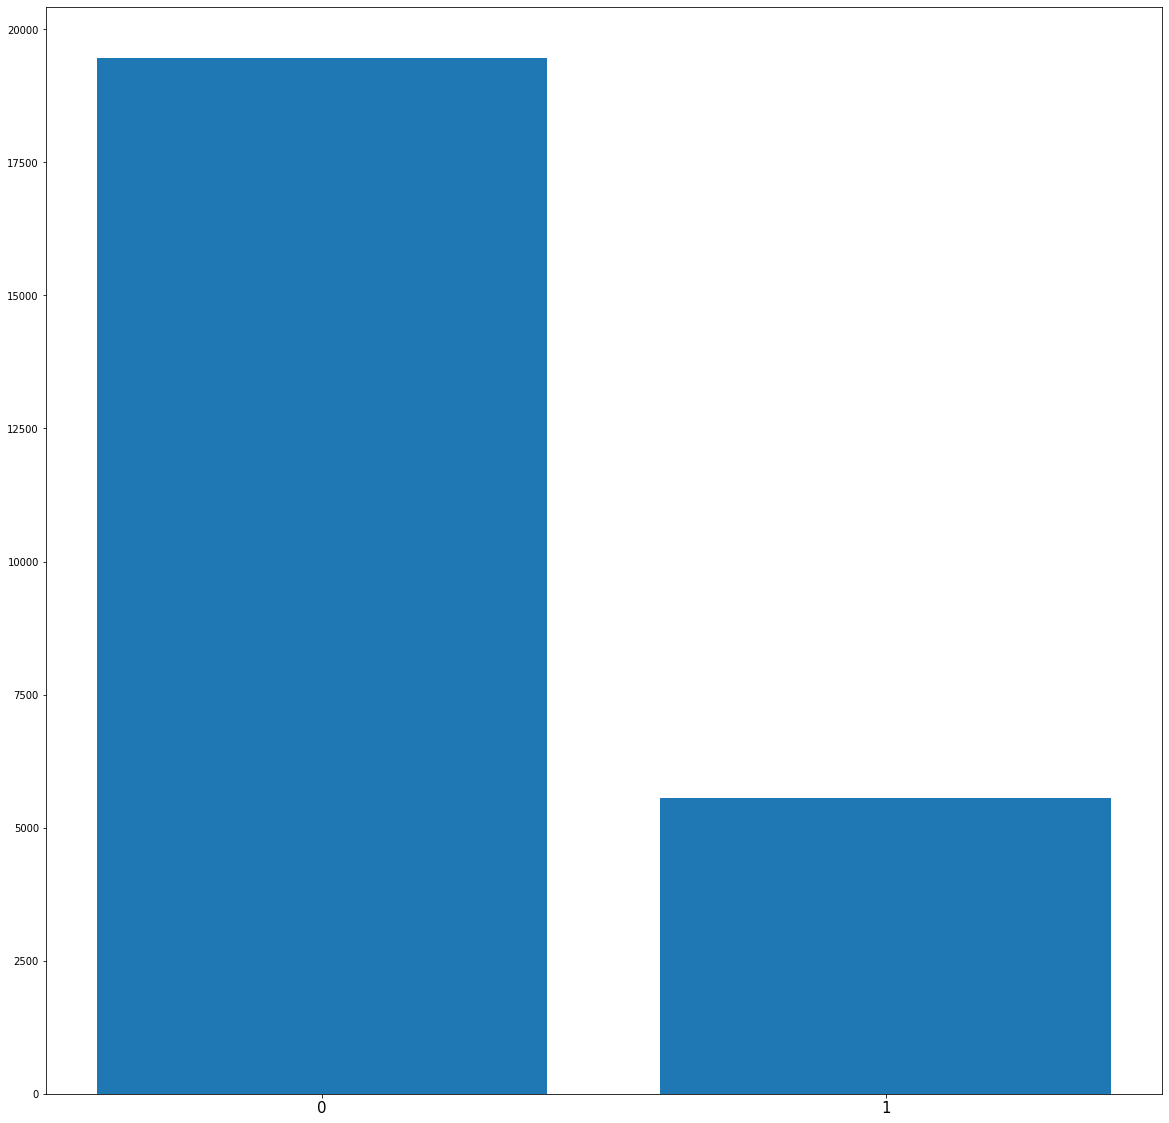

In [26]:
fig = plt.figure(figsize=(20,20))
plt.bar(train_data['Y'].value_counts().index, train_data['Y'].value_counts().values)
plt.xticks(train_data['Y'].value_counts().index, fontsize=15)
plt.show()

Method to deal with imbalanced data
1. Choose a good metrics:  <br/> Confusion Matrix: recision/Recall/F1-score
2. Resampling Your Dataset:
  * You can add copies of instances from the under-represented class called over-sampling
  * use systematic algorithms to generate new instances: Synthetic Minority Over-sampling Technique
  * You can delete instances from the over-represented class, called under-sampling
  * imbalanced-learn package: https://github.com/scikit-learn-contrib/imbalanced-learn
3. Tune the class weight parameter

**4. Build a baseline model**

In [27]:
# Train test split
from sklearn.model_selection import train_test_split
Y = train_data['Y']
X = train_data.drop(['Y', 'id'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [28]:
# Use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight = {0:1, 1:3})
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
# ***metrics.classification_report is $$$$!!!!!

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3923
           1       0.63      0.33      0.43      1077

    accuracy                           0.81      5000
   macro avg       0.74      0.64      0.66      5000
weighted avg       0.79      0.81      0.79      5000



**5. Basic parameter tuning: Grid Searching**

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Create function that tests models scores
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator = est,
                        param_grid = param_grid,
                        scoring = 'f1_weighted',
                        verbose = 10,
                        n_jobs = n_jobs,
                        iid = True,
                        cv=cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)
    return model

In [31]:
# Define variables for function
param_grid = {'n_estimators': [100,300,500],
              'criterion': ['gini','entropy'],
             'class_weight': [{0:1, 1:3}]}

RF = search_model(X.values,
                 Y.values,
                 RandomForestClassifier(),
                 param_grid,
                 -1, 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  4.0min remaining:   26.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.7min finished
/Users/juanvasquez/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [32]:
print("Best Score: %0.3f" % RF.best_score_)
print("Best Parameters set:", RF.best_params_)
print("Scores:", RF.cv_results_)


Best Score: 0.794
Best Parameters set: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 500}
Scores: {'mean_fit_time': array([10.19092531, 29.78417788, 48.58664241, 12.96893382, 38.60951252,
       58.747893  ]), 'std_fit_time': array([0.17557437, 0.40767873, 0.83387798, 0.12556696, 0.32462128,
       8.01486061]), 'mean_score_time': array([0.21766634, 0.85176139, 1.33547344, 0.19323778, 0.57267494,
       0.91152554]), 'std_score_time': array([0.00502062, 0.17681066, 0.29010199, 0.00294228, 0.00552683,
       0.21487665]), 'param_class_weight': masked_array(data=[{0: 1, 1: 3}, {0: 1, 1: 3}, {0: 1, 1: 3}, {0: 1, 1: 3},
                   {0: 1, 1: 3}, {0: 1, 1: 3}],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                   'entropy'],
             mask=[False, False, False, False, False, False],
       fill_va

**6. Model Ensemble**

In [34]:
# Ensemble Logistic Regression, KNN, and Voting Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators=300, criterion = 'entropy', class_weight = {0:1, 1:3})
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression(class_weight = {0:1, 1:3})

# results from my gridsearch
eclf = VotingClassifier(estimators=[('Random_Forest', clf1), ('KNN',clf2),('Logistic', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Random_Forest', 'KNN', 'Logistic','Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=3, scoring='f1_weighted')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.79 (+/- 0.00) [Random_Forest]
Accuracy: 0.71 (+/- 0.00) [KNN]


/Users/juanvasquez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/juanvasquez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

Accuracy: 0.71 (+/- 0.01) [Logistic]


/Users/juanvasquez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/juanvasquez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

Accuracy: 0.76 (+/- 0.01) [Ensemble]


## Generate Final Submission

In [35]:
eclf.fit(X,Y)
y = pd.DataFrame(eclf.predict(test_data.drop(['id'], axis=1)), columns=['Y'])
predict_data = pd.concat([y, test_data['id']], axis=1)
predict_data.head(10)

/Users/juanvasquez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Y,id
0,0,25001
1,0,25002
2,0,25003
3,0,25004
4,0,25005
5,0,25006
6,0,25007
7,0,25008
8,0,25009
9,0,25010


In [36]:
predict_data.to_csv('submissions.csv', index=False)